In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

%matplotlib inline

# 1. INTRODUCTION
Digital signal processing is used to analyze, edit and extract data from signals in digital (or numerical) form. 

The goal of signal processing is usually to reduce noise or interference, or to adequately transform the signal for the next processing stage.

Typical signals:
* speech, music, video
* biosignals
* telecommunication signals

Often the original signals are in analogue form and are converted to discrete time digital form by sampling and quantization. Conversely, many digital signals need to be converted to analogue continuous time form, e.g., for 'human consumption' such as video and audio, or for radio transmission of data. Among the objectives of this course is to provide understanding of the phenomena 

### 1.1. Pros of digital signal processing
* precision that is dependent on the number of bits used for representation
* duplication as each copy of the system in question works exactly in the same manner
* operation does not depend on temperature and does not suffer from ageing like analogue solutions do
* the hardware can usually be programmed to perform new operations
* enables solutions that are impossible to achieve with analogue technology, for instance adaptive and linear phase filters
* can work with frequencies that analogue filters are impractical with
* DSP is usually the only sensible solution for signals already in digital form
* DSP benefits from the advancements of semiconductor technology, for instance faster speeds and reduction of silicon area required per operation

### 1.2. Cons of discrete-time processing
**Speed and cost**: Fast DSP is expensive as fast A/D and D/A converters are costly. The processing of signals with high frequencies such as 1GHz or more often requires analogue technology.

**Design time**: The time it takes to design a DSP implementation is typically longer than that of an analogue implementation. The reason for this is usually the need for chip-level hardware and machine language implementations.

**The effects of finite wordlength**: This is a particularly troublesome factor slowing down the practical designing process. For cost-efficiency reasons the shortest applicable wordlength is used for the implementations. Floating-point units are still somewhat unusual in the DSP parts of massproduced products, although neural network designs have brought changes. In addition, computing with floating point numbers is more or less an unknown concept when it comes to operating with ASICs. Regardless of the tools used, working with problems resulted from finite wordlength can take up most of the designing work of the implementors.

### 1.3. Applications for DSP

Control and systems engineering: process control, spectrum analysis, ...

Image data processing: coding, character recognition, noise removal, fax, ...

Speech processing: coding, recognition, synthesis, ...

Telecommunication: data transfer, echo removal, adaptive equalizers, channel estimation, CDMA, ...

Medicine: CT, MRI, EEG and ECG signal analysis, ...

Military applications: radars, sonar, encryption, ...

Artificial intelligence: neural networks, preprocessing, ...

### 1.4. Key operations of discrete-time signal processing

Most solutions are similar and consist of the same basic operations.

Sampling: transform from continuous-time to discrete-time

Quantization: assigning discrete values for samples

Convolution: the linear convolution of finite-length sequences x(k) and h(k) with the lengths of N<sub>1</sub> ja N<sub>2</sub> is

$$
y(n)=h(n) \otimes x(n)=\sum_{k=-\infty}^{\infty} h(k) x(n-k)=\sum_{k=0}^{M} h(k) x(n-k)
$$

where n = 0,..., M-1 and M = N<sub>1</sub> + N<sub>2</sub> -1.

Convolution is a basic operation of digital filtering and one of the most common elements of DSP. An example of convolution can be found below. 
* h(n) can be interpreted as the impulse response of a digital system, and y(n) as the output with input of x(n)

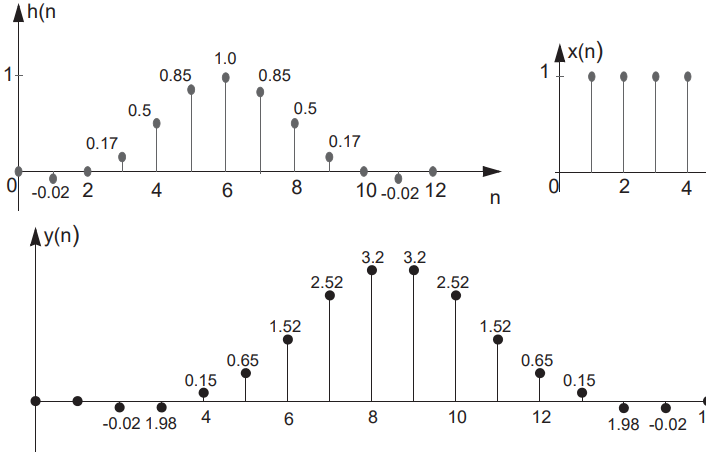

### Hint
Feel free to change the input sequences in the convolution example below. For instance, try h=np.array([1,0,0,-1]) and x=np.array([3,2,1]) an do the convolution also manually to understand the reversion of sequence x. As a matter of fact, it does not matter which sequence is reversed.

In [ ]:

# h = np.array([0, -0.02, 0, 0.17, 0.5, 0.85, 1.0,
#              0.85, 0.5, 0.17, 0, -0.02, 0])

# x = np.array([0, 1, 1, 1, 1])

h=np.array([1,0,0,-1])
x=np.array([3,2,1])

y = signal.convolve(h, x)

fig, ax = plt.subplots(1, 2)
ax[0].stem(h)
ax[0].set_title("h(n)")
ax[1].stem(x)
ax[1].set_title("x(n)")
fig.tight_layout()
fig, ax = plt.subplots()
ax.stem(y)
ax.set_title("y(n)")
fig.tight_layout()

Correlation: autocorrelation can be used to examine structural features of a signal, like periodicity; cross-correlation is a measure of similarity of two signals that can also be used to express a signal from noise.

Digital filtering: convolution of the signal's and the filter's impulse responses

Discrete transformation: expressing a discrete-time signal in either frequency or time domain to, for instance, determine the bandwidth.

Correlation and convolution can be efficiently performed in frequecy domain when the sequences are long. The most common discrete transform for this purpose is DFT (Discrete Fourier Transform):

$$
X(k)=\sum_{n=0}^{N-1} x(n) \exp \left(-j 2 n k \frac{\pi}{N}\right)
$$

Transform to continuous-time: D/A conversion, we'll return to the topic later on.

### 1.5. Typical DSP system

The figure below illustrates the general frame of digital signal processing.

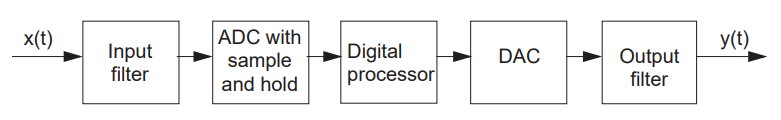

The actual conversion from analog to digital is performed during the A/D conversion, in accordance with the figure below

1. a band-limited signal is sampled resulting in discrete-time signal with continuous amplitude (time discretization)
2. each sample is quantized (amplitude discretization)
3. each quantized sample is expressed in binary form

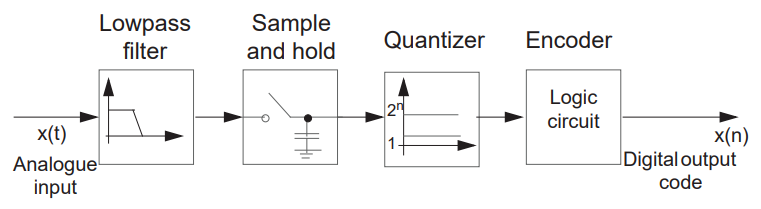

### 1.6. Sampling theorem

A continuous-time signal can be reconstructed perfectly based on its samples if the sampling frequency 

$$
F_{s} \geq 2 f_{\max }
$$

where f<sub>max</sub> is the highest frequency component in the signal, also known as the Nyquist frequency.

For example, if the highest frequency component is 10 kHz the sampling must be performed with the frequency of F<sub>s</sub> = 20 kHz. Otherwise, the frequencies that are higher than F<sub>s</sub>/2 must be eliminated to avoid aliasing. => an anti-aliasing filter is needed. In practice, larger sampling rates (often by around 1.25x) than defined by theory are used due to challenges in implementing steep filters.

Below is an example of aliasing examined in time domain. The values of both the aliased and actual signal are the same at each sampling point even though their frequencies differ.

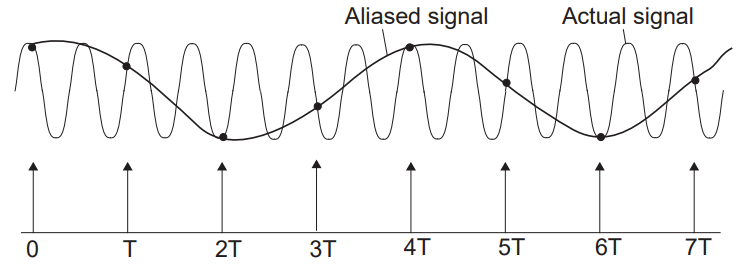

Aliasing error cannot be corrected after sampling! Notice that the Nyquist criterion holds also for I/Q sampling. In that case each complex sample can be viewed as two samples. 

Sampling can be interpreted as multiplication of the continuous time domain signal x(t) with the sampling function p(t) which is a unit impulse train.

The illustration below shows  x(t) and p(t), the product of the signals, and the convolution of their frequency domain representations, or spectra (convolution in frequency domain corresponds to product in time domain). This figure is important to understand.

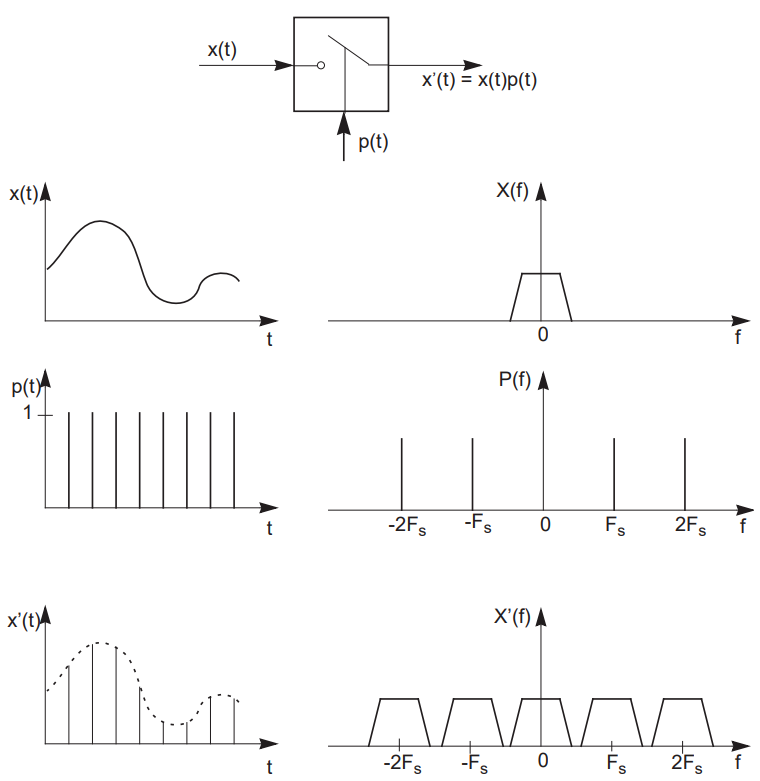

From these figures we can establish that

1. the spectrum of the sampled signal is the same as for the analog counterpart except it is repeated with the interval of the sampling frequency F<sub>s</sub>. This means that
2. if the sampling frequency is not adequate, such as

   $$
   F_{s}<2 f_{\max }
   $$
   
   this will result in aliasing (in the figure below aliasing is illustrated in the frequency domain, F<sub>N</sub> = F<sub>s</sub>/2 = Nyquist frequency)
   

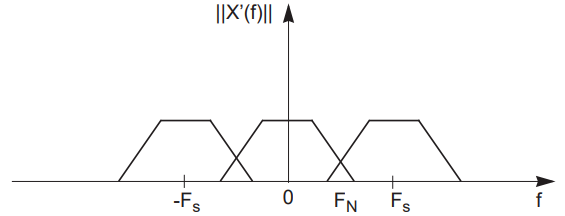

In practice, aliasing is always present! It occurs due to noise and frequency components outside of the bandwidth. A fundamental problem in designing is to choose an acceptable amount of aliasing, design a suitable anti-aliasing filter and choose the sampling frequency F<sub>s</sub>.

### 1.7. Anti-aliasing filtering

Aliasing can be reduced by either

1. limiting bandwidth of the signal or
2. increasing sampling frequency F<sub>s</sub> to alienate the spectrums of the signal and its images

The magnitude response of an ideal anti-aliasing filter can be the following:

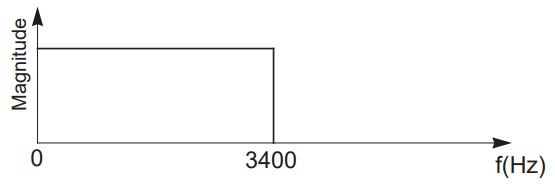

In practice, the filter's response doesn't follow the ideal response of a "brick-wall filter" and could resemble the response seen below. Here f<sub>c</sub> and f<sub>s</sub> are the edge frequencies for the passband and stopband, respectively. Notice the decibel scale and the stopband attenuation phenomena.

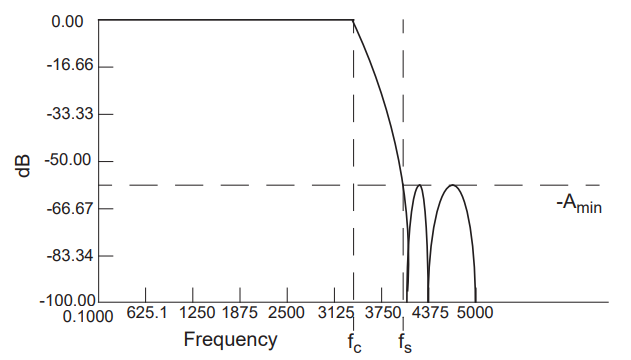

Realistically, the magnitude response for the the passband is not quite even and the phase response is not linear => the delay for signal components caused by the filter is not a function of frequency. Below is an example of a realistic phase response. Notice the use of radians.

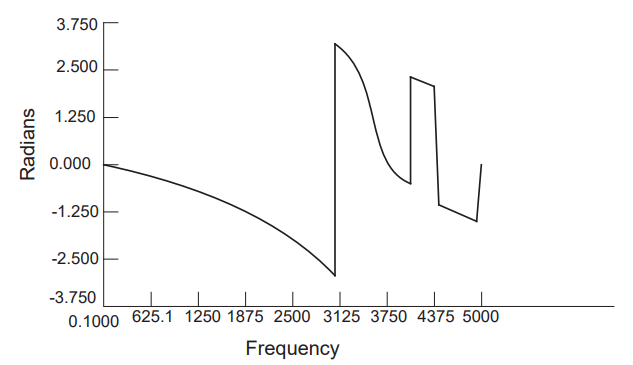

When designing an anti-aliasing filter one should take the resolution of the A/D conversion into consideration as well. The filter must be designed to attenuate the signal components going over the Nyquist frequency to be below the quantization error.

Usually the errors caused by an anti-aliasing filter increase as the filter gets steeper. Consequently, in digital signal processing higher sampling frequencies tend to be used more. In that case

1. anti-aliasing filters are simplified and become less expensive
2. phase errors diminish
3. S/N improves
4. allows digital adjustments of the band edge frequencies

#### Example 1.1.

How much attenuation is needed in the stopband to make the aliasing error to stay below quantization error when the resolution of the A/D conversion is B bits?

1. Quantization error is at most 1/2 LSB with rounding quantization. The error can be assumed to be uniformly distributed between [-q/2, q/2] where q is the distance between the quantization levels, and to have the average of zero. Based on the definition, the variance (power) of quantization error is

$$
\operatorname{Var}(v)=E\left(v^{2}\right)=\int_{-\frac{q}{2}}^{\frac{q}{2}} r^{2}\left(\frac{1}{q}\right) d r=\frac{q^{2}}{12}
$$

2. Suppose the signal with the average of zero uses the A/D converter's entire dynamic range (2<sup>B</sup>-1)q =V<sub>fs</sub>=2A where A is the amplitude of the signal (fs= full scale or full swing).

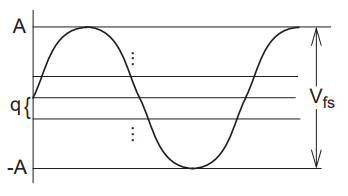

The average power of a sinusoidal signal is known to be A<sup>2</sup>/2. Therefore the signal-to-quantization-noise ratio is

$$
\mathrm{SQNR} =\frac{A^{2}}{2} / \frac{q^{2}}{12}=\frac{3}{2}\left(2^{B}-1\right)^{2} \cong 2^{2 B} \frac{3}{2}
$$

which in decibels is

$$
\mathrm{SQNR}_{dB}=10 \log \left(2^{2 B} \frac{3}{2}\right)=20 \log 2^{B}+20 \log 1.5^{\frac{1}{2}}
$$

Therefore SQNR = 6.02B + 1.76 dB

From this we can notice that every additional bit improves SQNR by 6 decibels. Typically for practical applications 12-16 bits is sufficient.

<table>
    <thead>
        <tr>
            <th style="text-align:center; width:100px">B</th>
            <th style="text-align:center; width:100px">SQNR (dB)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align:center">6</td>
            <td style="text-align:center">37.9</td>
        </tr>
        <tr>
            <td style="text-align:center">8</td>
            <td style="text-align:center">49.9</td>
        </tr>
        <tr>
            <td style="text-align:center">12</td>
            <td style="text-align:center">74.0</td>
        </tr>
    </tbody>
</table>

3. We notice that the attenuation must be designed to be greater than SQNR. It should be also noted that this is the minimum required attenuation. In addition, the consequences of the steepness of the filter must be considered.

<hr>

#### Example 1.2.

In the system below the anti-aliasing filter is a first-order Butterworth type filter.

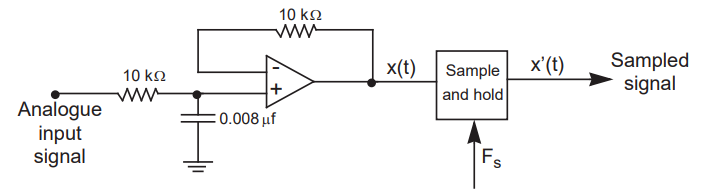

Let us solve the sampling frequency with which we achieve at most 2% aliasing error at the edge frequency f<sub>c</sub>. 

The magnitude response of a first-order Butterworth filter is given by

$$
|H(f)|=\frac{1}{\sqrt{1+\left(\frac{f}{f_{c}}\right)^{2}}}
$$

where f<sub>c</sub> = 1/(2&pi;RC) = 2 kHz. The spectrum of the signal after the filter is

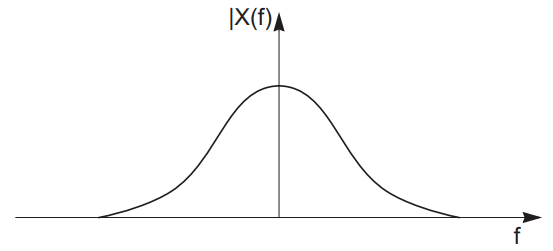

After sampling the spectrum repeats at the multiples of the sampling frequency. Aliasing can be seen from the overlapping of the signals.

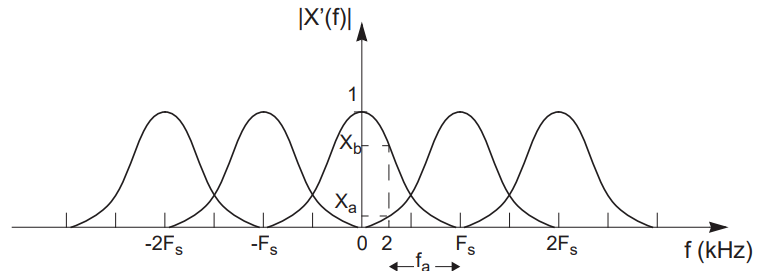

At the frequency of 2 kHz the filter's signal level is X<sub>b</sub>=X(2 kHz) = 0.7071 (3 dB point is chosen when the edge frequency is not otherwise specified).

Therefore the maximum desired aliasing error is<br>
< 0.02\*0.7071 = 0.01414, so

$$
0.01414>\frac{1}{\sqrt{1+\left(\frac{f_{a}}{2 \mathrm{kHz}}\right)^{2}}}
$$

from which can the aliased frequency be solved as f<sub>a</sub> > 141.4 kHz.

At the edge frequency, the aliasing error caused by the spectrum image is below the desired threshold when 

F<sub>s</sub> > f<sub>c</sub> + f<sub>a</sub> = 2 kHz + 141.4 kHz = 143.4 kHz

<hr>

#### Example 1.3.

The figure below illustrates the magnitude spectrum of an analog signal.

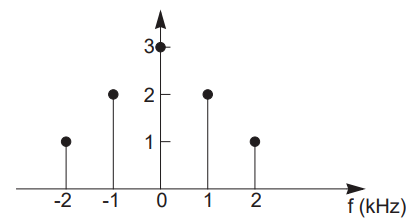

a) The signal is sampled with the frequencies f<sub>s1</sub>=5 kHz and
f<sub>s2</sub>=3.5 kHz. Show the resulting magnitude spectrum of the discrete-time signal in each case.

b) When the signal is sampled at f<sub>s</sub>=3.5 kHz anti-aliasing filtering is done with a Butterworth filter, the magnitude response of which can be obtained from the following formula:

$$
|H(f)|=\frac{1}{\sqrt{1+\left(\frac{f}{f_{c}}\right)^{2 n}}}
$$

The filter is required to attenuate 3 dB at 1 kHz and the aliased signal components must be attenuated at least 20 dB from the passband edge frequency and on.

Determine the required order of the filter *n*. (About the *digital filter* terminology: filter order is the number of delay elements in the filter. In case of *analogue filters* the order is the highest power of the denominator of the transfer function)

a) Sampling 5 kHz:

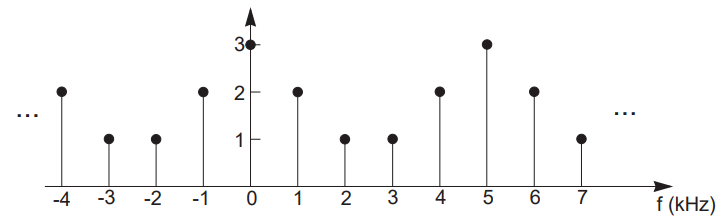

Sampling 3.5 kHz:

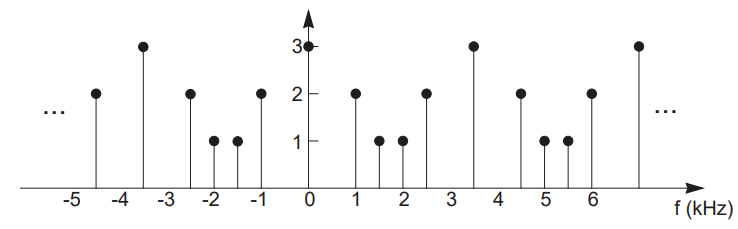

b) From the figure above the first aliased frequency is determined to be at 1.5 kHz, f<sub>a1</sub>=2.0 kHz below the sampling frequency 3.5 kHz.

At this frequency the attenuation must be 20 dB + 3 dB = 23 dB. 

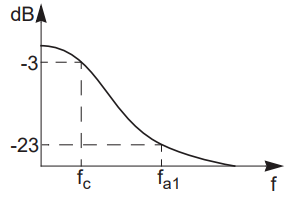

The magnitude response can be obtained from the following formula:

$$
|H(f)|=\frac{1}{\sqrt{1+\left(\frac{f}{f_{c}}\right)^{2 n}}}
$$
where f<sub>c</sub>=1 kHz.

Now, 

$$\begin{aligned}
20 \log \left(1+\left(\frac{2}{1}\right)^{2 n}\right)^{-1 / 2} &\leq-23 \\
-10 \log \left(1+2^{2 n}\right) &\leq-23 \\
\log \left(1+2^{2 n}\right) &\geq 2.3 \\
1+2^{2 n} &\geq 10^{2.3} \\
2^{2 n} &\geq 10^{2.3}-1 \\
2 n &\geq \frac{\ln \left(10^{2.3}-1\right)}{\ln (2)}=\frac{5.2909}{0.693}=7.63 \\
n &\geq 3.82 \\
\Rightarrow n &\geq 4
\end{aligned}
$$

### 1.8. Accuracy and bandwidth

Aperture effect: in reality, the sampling function is not a unit impulse; rather, it has finite width => the signal can vary during taking the sample. (You may also notice that image sensors sampling is not by an 'impulse field'; in this course we don't consider such cases).

Suppose that the maximum permissible change during sample acquisition is 1/2 LSB and let us examine the matter in the case of a sine wave.

Suppose the amplitude of the signal is A which is half of the dynamic range V<sub>FS</sub>, let &tau; be the aperture time and &Delta;v be the signal's change during the time &tau;. In the case of a sine wave the biggest change happens while crossing the X axis. 

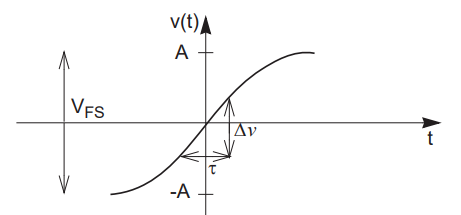

Now the signal's

$$
v(t)=A \sin \omega t
$$

derivative at t=0 is 

$$
\frac{d v(t)}{d t}=A \omega \cos \omega t=A \omega=A 2 \pi f=\pi f V_{F S}
$$

This can be expressed as

$$
\frac{\Delta v}{\tau}=\pi f V_{F S}
$$

and because &Delta;v=1/2 LSB and V<sub>FS</sub>=2<sup>B</sup>, follows

$$
f_{\max }=\frac{0.5}{\tau \pi 2^{B}}=\frac{1}{\tau \pi 2^{B+1}}
$$

If &tau;=1 μs and B=16, f<sub>max</sub>=240 Hz! On the contrary, if sampling frequency is F<sub>s</sub>=100 MHz, t=10 ns and B=16, f<sub>max</sub>= 25 kHz...

Sampling requires the hold (Sample & Hold, S&H) before A/D conversion as when A/D converter is used without a S/H frontend, delta time = aperture time

<hr>

#### Example 1.4.

An A/D converter is required to have the dynamic range of 80 dB when the maximum interesting frequency is f<sub>max</sub>=20 kHz, in which case the number of quantization levels is B=13.2, rounded up to 14 bits (20log2<sup>B</sup>=80 dB). Now the maximum aperture time can be calculated using the formula

$$
f_{\max }=\frac{1}{\tau \pi 2^{B+1}}
$$

By assigning B and f<sub>max</sub> the aperture time is determied to be &tau;=0.48 ns.

From this can be stated that the sampling frequency must be at least F<sub>s</sub>=40 kHz, for which S&H is required as the sampling interval is 25 µs.
The figure below illustrates the required sampling solution.

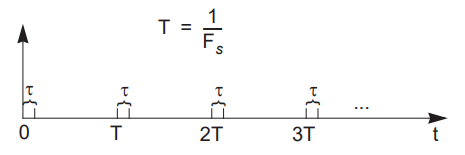

### 1.9. D/A conversion

A digital signal is often converted back to  analog form after processing it, for instance to produce sound or picture. The figure below illustrated zero-order-hold (ZOH) and is important to understand.

Typically, the continuous-time and discrete-amplitude signal produced by the D/A converter is then low-pass filtered using a filter known as either reconstruction, smoothing or an anti-imaging filter.

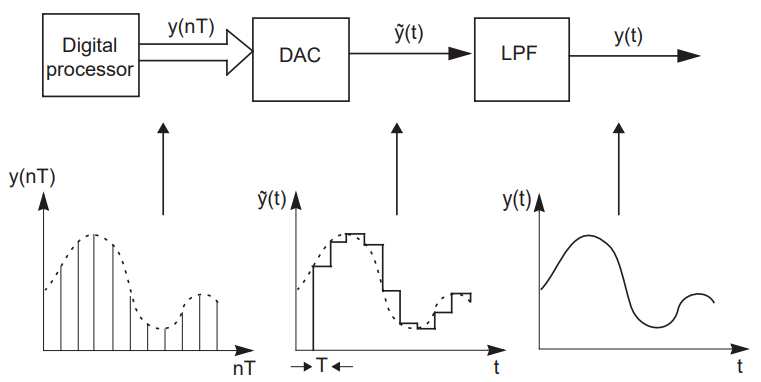

The D/A converter shown above has zero order hold that results in a step with the width of T per each input.

Due to the holding feature, the spectrum of the signal appears to have aperture error ${\sin(x)} / x$ where x =&omega;T/2. This functions similarly to a low-pass filter.

Compare the spectrum of the D/A converter input signal shown below

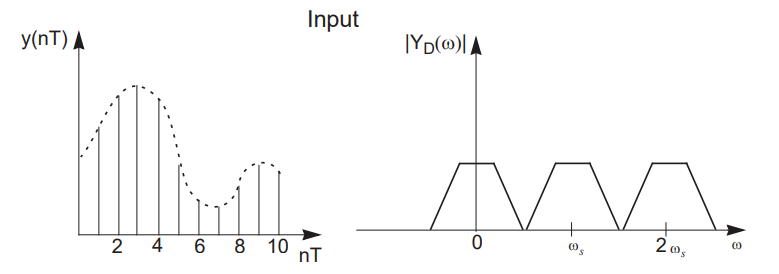

to the following output spectrum:

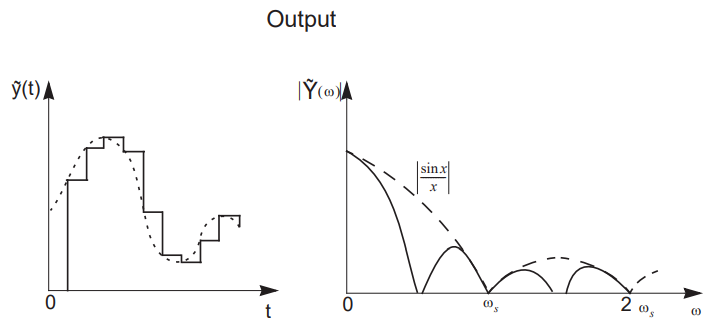

The error caused by aperture error at each frequency can be expressed as the relative error from the accurate, error-free signal

$$
1-\left|\frac{\sin x}{x}\right| \text{ or }\left(1-\left|\frac{\sin x}{x}\right|\right) \times 100 \%
$$

In the case of zero order hold ${\sin(x)} / x$ drops to 4 dB by the frequency F<sub>s</sub>/2 (x=2&pi;F<sub>s</sub>T/4=&pi;/2) at which point the error is 
100%\*(1-2/&pi;)=36.3%.

Aperture error can be eliminated with equalization: Before the D/A conversion the signal is filtered with a digital filter with magnitude response of $|x ⁄ sinx|$:

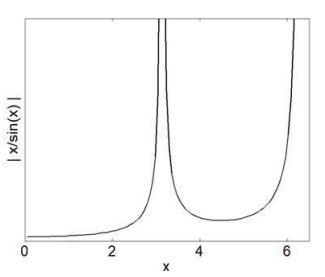

Occasionally in DSP, interpolation is used to insert new points between the samples input to the D/A converter. As a result of this the analog signal smoothens and the result is better than that of zero order hold. Another possible solution is to use multirate digital signal processing.

Both solutions improve S/N and simplify the anti-imaging filter, the function of which is to eliminate high frequency components. These are undesired for the sake of side effects such as intermodulation distortion.

<hr>

#### Example 1.5.

In the system below the band of an analog signal reaches up to 20 kHz and the frequency of the D/A converter is 176.4 kHz (the device in question is undoubtedly a CD player; while the lecturer apologizes using an outdated example, it is for the ease of explanation).

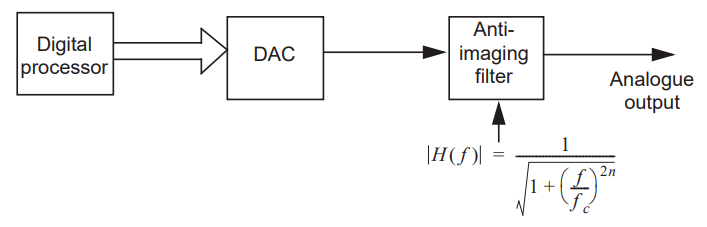

The image frequencies are required to be attenuated at least 50 dB and the attenuation of the interesting band can be 0.5 dB at most. If the reconstruction filter is Butterworth filter type, what are its minimum possible order and edge frequency?

Suppose that zero order hold is used => the output of the D/A converter is the product of the signal spectrum and aperture effect ${\sin(x)} / x$

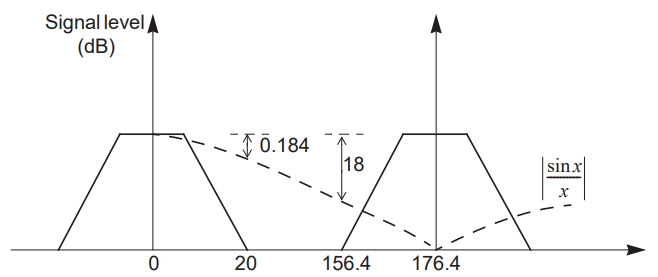

From the figure above the lowest image frequency is determined to be at 156.4 kHz. Now as a result of aperture effect, at 20 kHz we get

$$
\frac{\sin x}{x}=\frac{\sin (0.356)}{0.356}=0.979 \text{ as } x=\frac{\omega T}{2}=\frac{2 \pi f_{\max }}{2 F_{s}}
$$

Because 20log(0.979)=-0.184 dB, we can determine that the attenuation of passband of the reconstruction filter must be less than (0.5 - 0.184 dB) = 0.316 dB as the aperture effect accounts for the 0.184 dB.

Let us examine the amount of stopband attenuation caused by the aperture effect

$$
\frac{\sin x}{x}=0.125 \text { as } x=\frac{\omega T}{2}=\frac{2 \pi 156.4 \mathrm{kHz}}{2 F_{s}}
$$

Because 20log(0.125) = -18 dB (attenuation of 18 dB) and the requirement is -50 dB, stopband attenuation requires at least 50-18 = 32 dB more attenuation.

The magnitude response of a Butterworth filter is 

$$
|H(f)|=\frac{1}{\sqrt{1+\left(\frac{f}{f_{c}}\right)^{2 n}}}
$$

where n is the order of the filter. From the inequality pair below can be solved

$$
20 \log \left(1+\left(\frac{20 \mathrm{kHz}}{f_{c}}\right)^{2 n}\right)^{\frac{1}{2}} \leq 0.316 \mathrm{dB}
$$

$$
20 \log \left(1+\left(\frac{156,4 \mathrm{kHz}}{f_{c}}\right)^{2 n}\right)^{\frac{1}{2}} \geq 32 \mathrm{dB}
$$

n = 2.5, rounded up to 3 and f<sub>c</sub> = 30.76 kHz.

Based on this result a filter, the magnitude response of which is shown below,  can be implemented.

In [ ]:
b, a = signal.butter(3, 30760*2*np.pi, analog=True)
w, h = signal.freqs(b, a)

fig, ax = plt.subplots()
ax.plot((w/(2*np.pi)) / 1000, 20*np.log10(np.abs(h)))
ax.set_title("Magnitude response (dB)")
ax.set_ylabel("Magnitude (dB)")
ax.set_xlabel("f (kHz)")
fig.tight_layout()

<hr>

### 1.10. Signal processors

The characteristics of signal processors used to be one clock cycle multiply-accumulation (MAC), instantaneous loop function, option for saturation arithmetic and separate buses for data and instructions. Currently, such features are available in many MCUs that feature SIMD and GPU units. Application specific processors exist for for multiple domain, and new ones are designed to fulfill emerging needs.

Most corrent system designs feature Systems-on-Chips (SoCs) that often comprise of a multiple processor cores and hardware accelerators.

### 1.11. Limitations of DSP

A/D conversion to finite-length binary words causes quantization error. This can be countered by using longers wordlength and oversampling.

Aliasing errors cannot be fully avoided. They can be reduced by bandlimiting the signal prior to sampling or with multirate methods.

Zero order D/A conversion causes aperture error that can be diminished with equalization.

Anti-aliasing filters cause errors in magnitude and phase responses.These can be corrected in the digital domain.

Sigma-Delta converters (one-bit ADC and DAC) have very high sampling rates. These are fully linear converters implemented using digital technology, but require analog design expertise.### 1.11. Limitations of DSP

ADC to finite length binary words causes quantization error. 
This can be countered by using longers wordlength and oversampling.

Aliasing errors cannot be fully avoided. They can be reduced by bandlimiting the 
signal prior to sampling or with multirate methods.

Zero order DAC causes aperture error that can be diminished with equalization.

Anti-aliasing filters cause errors in magnitude and phase 
responses.These can be corrected in the digital domain.

Sigma-Delta converters (one-bit ADC and DAC) have very high 
sampling rates. These are fully linear converters implemented using digital technology, but require analog design expertise.